<a href="https://colab.research.google.com/github/JGH94/python_Movie_Data/blob/main/python_Movie_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# 참고 https://github.com/wesm/pydata-book
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# 데이터 바인딩
uName = ['user_id','gender','age', 'occupation','zip']
user = pd.read_table('/content/sample_data/users.dat',sep= '::' , header = None, names = uName)
print(user[:5])
print('-------------------------------------------------------------------------------------')
rName = ['user_id','movie_id','rating', 'timestamp']
ratings = pd.read_table('/content/sample_data/ratings.dat',sep= '::' , header = None, names = rName)
print(ratings[:5])
print('-------------------------------------------------------------------------------------')
mName = ['movie_id','title','genres']
movies = pd.read_table('/content/sample_data/movies.dat',sep= '::' , header = None, names = mName)
print(movies[:5])

   user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455
-------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291
-------------------------------------------------------------------------------------
   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


1------------------------------------------------------
   user_id  movie_id  rating  timestamp gender  age  occupation    zip  \
0        1      1193       5  978300760      F    1          10  48067   
1        2      1193       5  978298413      M   56          16  70072   
2       12      1193       4  978220179      M   25          12  32793   
3       15      1193       4  978199279      M   25           7  22903   
4       17      1193       5  978158471      M   50           1  95350   

                                    title genres  
0  One Flew Over the Cuckoo's Nest (1975)  Drama  
1  One Flew Over the Cuckoo's Nest (1975)  Drama  
2  One Flew Over the Cuckoo's Nest (1975)  Drama  
3  One Flew Over the Cuckoo's Nest (1975)  Drama  
4  One Flew Over the Cuckoo's Nest (1975)  Drama  
user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                         

([<matplotlib.axis.YTick at 0x7f9fc7497df0>,
 [Text(0, 0, 'Close Shave, A (1995)'),
  Text(0, 0, 'Rear Window (1954)'),
  Text(0, 0, 'Great Escape, The (1963)'),
  Text(0, 0, 'Shawshank Redemption, The (1994)'),
  Text(0, 0, 'Wrong Trousers, The (1993)'),
  Text(0, 0, 'Raiders of the Lost Ark (1981)'),
  Text(0, 0, 'North by Northwest (1959)'),
  Text(0, 0, 'Hustler, The (1961)'),
  Text(0, 0, 'Double Indemnity (1944)'),
  Text(0, 0, 'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)')])

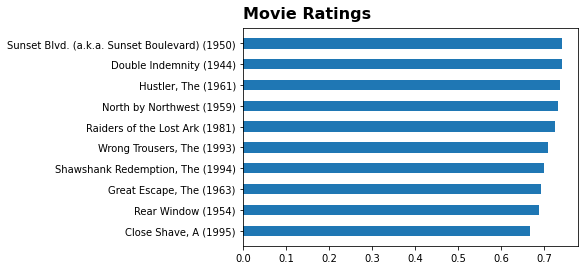

In [14]:
# 불러온 데이터를 하나로 병합
list_ = pd.merge(pd.merge(ratings, user), movies)
print('1------------------------------------------------------')
print(list_[:5])
print(list_.iloc[0])
print('2------------------------------------------------------')
# 영화 평점 건수가 250건 이상 영화 구하기
ratings_by_title = list_.groupby('title').size()
print(ratings_by_title[:10])
list_250 = ratings_by_title.index[ratings_by_title >= 250]
print(list_250[:10])
print('3------------------------------------------------------') 
# 영화를 성별에 따른 평균 평점 구하기
mean_ratings = list_.pivot_table('rating', index = 'title', columns = 'gender' , aggfunc='mean')
mean_ratings = mean_ratings.loc[list_250] 
print(mean_ratings[:10])
print('4------------------------------------------------------')  
# 호불호 차이 : diff 가 + 면 남자가 호, -면 여자가 호 0 에 가까울수록 호불호 X
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
top_female_rating = mean_ratings.sort_values(by='diff')
print(top_female_rating[:10])
print(top_female_rating[::-1][:10])
print('5------------------------------------------------------')   
# 표준편차를 구해보자 (250 건 이상 적용)
rating_Value = list_.groupby('title')['rating'].std()
rating_Value = rating_Value.loc[list_250]
print(rating_Value.sort_values(ascending=True)[:10])
# 표준편차 값을 시각화
X_ = []
Y_ = []
for x,y in rating_Value.sort_values(ascending=True)[:10].items():
  X_.append(x)
  Y_.append(y)  
x_ = np.arange(10)
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.barh(x_, Y_, height = 0.5)  
plt.title('Movie Ratings', fontdict=title_font, loc='left', pad=10)
plt.yticks(x_, X_)